In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from uuv_waypoints import Waypoint, WaypointSet
from uuv_trajectory_generator import CSInterpolator

In [2]:
q_x = [0, 1, 2, 4, 5, 6]
q_y = [0, 2, 3, 3, 2, 0]
q_z = [0, 1, 0, 0, 2, 2]

q = np.vstack((q_x, q_y, q_z)).T
print(q)

[[0 0 0]
 [1 2 1]
 [2 3 0]
 [4 3 0]
 [5 2 2]
 [6 0 2]]


In [3]:
waypoints = WaypointSet()
for i in range(q.shape[0]):
    waypoints.add_waypoint(Waypoint(q[i, 0], q[i, 1], q[i, 2], max_forward_speed=0.5))

In [4]:
interpolator = CSInterpolator()
interpolator.init_waypoints(waypoints)
interpolator.init_interpolator()

 2019-06-20 18:02:11,751 | INFO | path_generator | Setting initial rotation as=[0 0 0 1]


True

Text(0.5, 0, 'Z [m]')

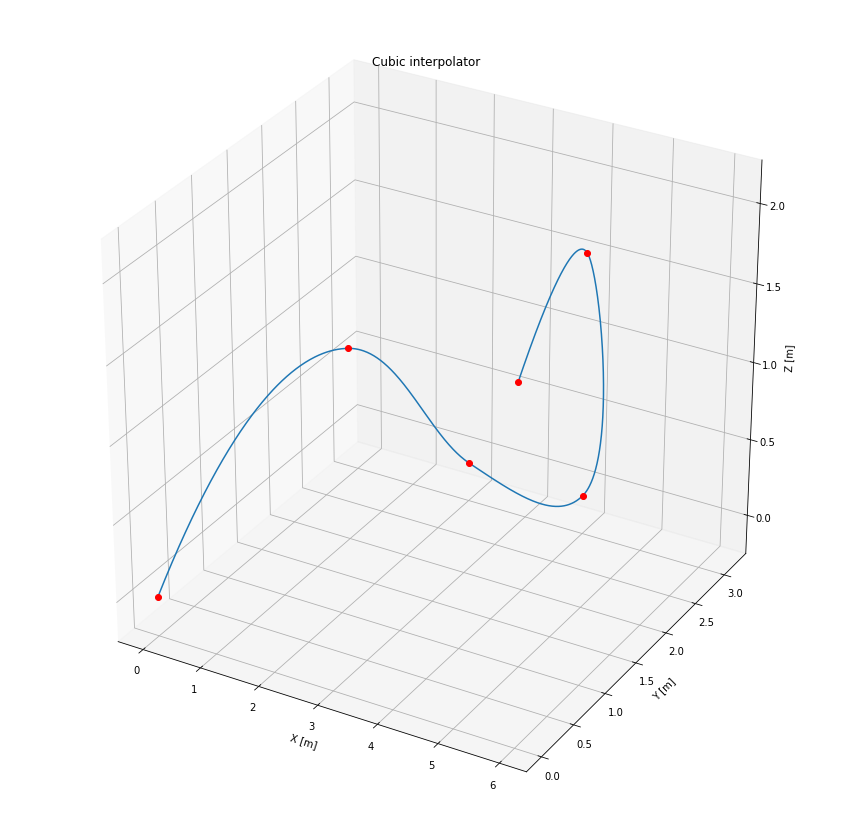

In [5]:
pnts = interpolator.get_samples(max_time=None)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    [p.x for p in pnts],
    [p.y for p in pnts],
    [p.z for p in pnts])
ax.plot(q_x, q_y, q_z, 'ro')

ax.set_title('Cubic interpolator')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')